In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Função para calcular o histograma de uma imagem
def calc_hist(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [4]:
# Função para calcular a distância de Bhattacharyya entre dois histogramas
def bhattacharyya(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_BHATTACHARYYA)

In [5]:
# Carregando as imagens
img4 = cv2.imread("caneca7.jpeg")
img5 = cv2.imread("caneca8.jpeg")
img6 = cv2.imread("caneca6.jpeg")

In [6]:
# Convertendo as imagens para escala de cinza
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
gray6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

In [6]:
def swain_ballard(img, n_bins, smooth_factor, threshold):
    # Calculando o histograma da imagem
    hist = cv2.calcHist([img], [0], None, [n_bins], [0, 256])
    hist = hist.flatten()
    
    # Suavizando o histograma
    hist_smoothed = cv2.GaussianBlur(hist, (0, 0), smooth_factor)
    
    # Inicializando a máscara do histograma
    hist_mask = np.zeros(hist_smoothed.shape, dtype=np.uint8)
    
    if threshold is not None:
        # Aplicando thresholding no histograma para encontrar as regiões de interesse
        T = threshold * hist_smoothed.max()
        hist_mask[hist_smoothed >= T] = 255
    
    # Encontrando os contornos das regiões de interesse
    contours, _ = cv2.findContours(np.uint8(hist_mask), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Encontrando os retângulos delimitadores das regiões de interesse
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    # Desenhando os contornos na imagem original
    img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)
    return img_contours, rects

In [7]:
# Detectando as canecas nas imagens usando o algoritmo de Swain & Ballard
canecas4 = swain_ballard(gray4, 10, 15, 0.5)
canecas5 = swain_ballard(gray5, 10, 15, 0.5)
canecas6 = swain_ballard(gray6, 10, 15, 0.5)

In [8]:
 hist4 = calc_hist(gray4)
hist5 = calc_hist(gray5)
hist6 = calc_hist(gray6)
 hist_canecas4 = calc_hist(img4)
hist_canecas5 = calc_hist(img5)
hist_canecas6 = calc_hist(img6)

In [9]:
# Calculando as distâncias de Bhattacharyya entre os histogramas 
dist1 = bhattacharyya(hist4, hist_canecas4)
dist2 = bhattacharyya(hist5, hist_canecas5)
dist3 = bhattacharyya(hist6, hist_canecas6)

Text(0.5, 1.0, 'Imagem original')

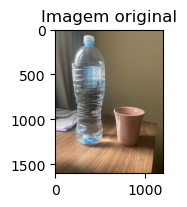

In [10]:
# Mostrando as imagens e os histogramas de comparação
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("Imagem original")

Text(0.5, 1.0, 'Canecas detectadas')

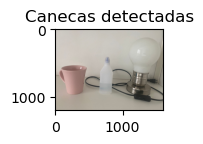

In [11]:
plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.title("Canecas detectadas")

Text(0.5, 1.0, 'Distância: 0.30')

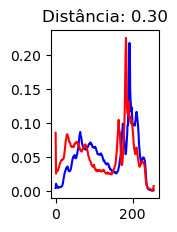

In [12]:
plt.subplot(2, 4, 3)
plt.plot(hist6, color="blue")
plt.plot(hist_canecas6, color="red")
plt.title("Distância: {:.2f}".format(dist1))

Text(0.5, 1.0, 'Imagem original')

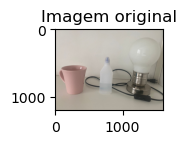

In [13]:
plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.title("Imagem original")

Text(0.5, 1.0, 'Canecas detectadas')

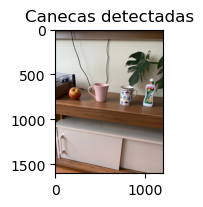

In [18]:
plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(img6, cv2.COLOR_BGR2RGB))
plt.title("Canecas detectadas")

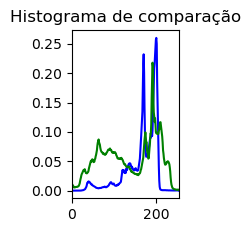

In [19]:
plt.subplot(2, 4, 6)
plt.plot(hist5, color="blue")
plt.plot(hist6, color="green")
plt.title("Histograma de comparação")

plt.xlim([0, 256])
plt.show()